##Import Libraries and Load Dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# printing the shapes
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28), y_train shape: (60000,)
x_test shape: (10000, 28, 28), y_test shape: (10000,)


In [ ]:
# count samples per class in training set
unique, counts = np.unique(y_train, return_counts=True)

print("Training set class distribution:")
for u, c in zip(unique, counts):
    print(f"Digit {u}: {c} samples")

# check if any missing values
print("\nMissing values in x_train:", np.isnan(x_train).sum())
print("Missing values in y_train:", np.isnan(y_train).sum())
print("Missing values in x_test:", np.isnan(x_test).sum())
print("Missing values in y_test:", np.isnan(y_test).sum())

Training set class distribution:
Digit 0: 6000 samples
Digit 1: 6000 samples
Digit 2: 6000 samples
Digit 3: 6000 samples
Digit 4: 6000 samples
Digit 5: 6000 samples
Digit 6: 6000 samples
Digit 7: 6000 samples
Digit 8: 6000 samples
Digit 9: 6000 samples

Missing values in x_train: 0
Missing values in y_train: 0
Missing values in x_test: 0
Missing values in y_test: 0


In [ ]:
# quick summary of inputs
print("x_train min/max:", x_train.min(), "/", x_train.max())
print("x_test min/max:", x_test.min(), "/", x_test.max())
print("y_train unique labels:", np.unique(y_train))
print("y_test unique labels:", np.unique(y_test))

x_train min/max: 0 / 255
x_test min/max: 0 / 255
y_train unique labels: [0 1 2 3 4 5 6 7 8 9]
y_test unique labels: [0 1 2 3 4 5 6 7 8 9]


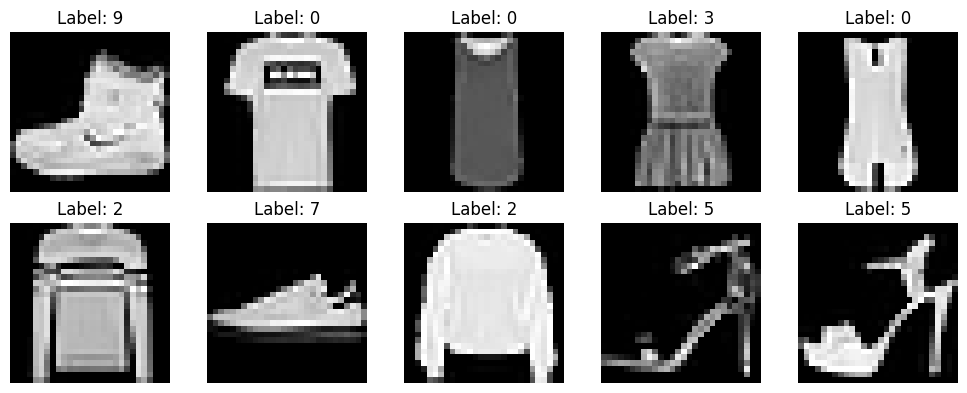

In [ ]:
# some examples
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
y_train[0]

np.uint8(9)

##Preprocess Dataset for NN and CNN

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# reshape for NN and CNN
x_train_nn = x_train.reshape(-1, 28*28)
x_test_nn  = x_test.reshape(-1, 28*28)

x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn  = x_test.reshape(-1, 28, 28, 1)

##Simple Neural Network (NN)

In [ ]:
# simple Neural Network
nn_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28*28,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# nn_model = Sequential([
#     layers.Dense(512, input_shape=(784,)),
#     layers.BatchNormalization(),
#     layers.LeakyReLU(alpha=0.01),
#     layers.Dropout(0.3),

#     layers.Dense(256),
#     layers.BatchNormalization(),
#     layers.LeakyReLU(alpha=0.01),
#     layers.Dropout(0.3),

#     layers.Dense(128),
#     layers.BatchNormalization(),
#     layers.LeakyReLU(alpha=0.01),

#     layers.Dense(10, activation='softmax')
# ])

nn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

print("Simple Neural Network Model Summary:")
nn_model.summary()

Simple Neural Network Model Summary:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_nn = nn_model.fit(x_train_nn, y_train,
                          epochs=20, batch_size=128,
                          validation_split=0.2, verbose=1)

nn_test_loss, nn_test_acc = nn_model.evaluate(x_test_nn, y_test, verbose=0)
print(f"\nSimple Neural Network Test Accuracy: {nn_test_acc:.4f}")

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7268 - loss: 0.7963 - val_accuracy: 0.8472 - val_loss: 0.4391
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8560 - loss: 0.4078 - val_accuracy: 0.8611 - val_loss: 0.3984
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8678 - loss: 0.3655 - val_accuracy: 0.8679 - val_loss: 0.3728
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8778 - loss: 0.3397 - val_accuracy: 0.8736 - val_loss: 0.3557
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8863 - loss: 0.3162 - val_accuracy: 0.8776 - val_loss: 0.3359
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8931 - loss: 0.2927 - val_accuracy: 0.8753 - val_loss: 0.3517
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8950 - loss: 0.2882 - val_accuracy: 0.8801 - val_loss: 0.3307
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9010 - loss: 0.2689 - val_accuracy: 0.

##Convolutional Neural Network (CNN)

In [ ]:
# CNN
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# cnn_model = Sequential([
#     layers.Conv2D(32, (3,3), input_shape=(28,28,1), padding="same"),
#     layers.BatchNormalization(),
#     layers.LeakyReLU(alpha=0.01),
#     layers.MaxPooling2D((2,2)),
#     layers.Dropout(0.25),

#     layers.Conv2D(64, (3,3), padding="same"),
#     layers.BatchNormalization(),
#     layers.LeakyReLU(alpha=0.01),
#     layers.MaxPooling2D((2,2)),
#     layers.Dropout(0.25),

#     layers.Flatten(),
#     layers.Dense(256),
#     layers.BatchNormalization(),
#     layers.LeakyReLU(alpha=0.01),
#     layers.Dropout(0.5),

#     layers.Dense(10, activation='softmax')
# ])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

print("\nCNN Model Summary:")
cnn_model.summary()


CNN Model Summary:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_cnn = cnn_model.fit(x_train_cnn, y_train,
                            epochs=20, batch_size=128,
                            validation_split=0.2, verbose=1)

cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"\nCNN Test Accuracy: {cnn_test_acc:.4f}")

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6993 - loss: 0.8343 - val_accuracy: 0.8508 - val_loss: 0.4167
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8654 - loss: 0.3793 - val_accuracy: 0.8748 - val_loss: 0.3432
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8832 - loss: 0.3260 - val_accuracy: 0.8864 - val_loss: 0.3191
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8934 - loss: 0.2916 - val_accuracy: 0.8968 - val_loss: 0.2892
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9035 - loss: 0.2686 - val_accuracy: 0.8844 - val_loss: 0.3126
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9092 - loss: 0.2494 - val_accuracy: 0.9010 - val_loss: 0.2839
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9150 - loss: 0.2320 - val_accuracy: 0.9039 - val_loss: 0.2637
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9235 - loss: 0.2099 - val_accuracy: 0.

##Compare Training History

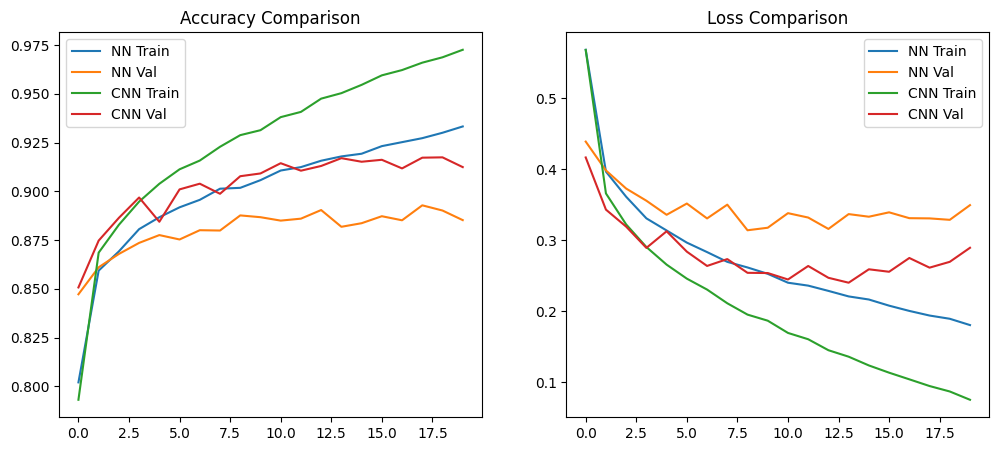

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_nn.history['accuracy'], label='NN Train')
plt.plot(history_nn.history['val_accuracy'], label='NN Val')
plt.plot(history_cnn.history['accuracy'], label='CNN Train')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val')
plt.title("Accuracy Comparison")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_nn.history['loss'], label='NN Train')
plt.plot(history_nn.history['val_loss'], label='NN Val')
plt.plot(history_cnn.history['loss'], label='CNN Train')
plt.plot(history_cnn.history['val_loss'], label='CNN Val')
plt.title("Loss Comparison")
plt.legend()
plt.show()

##Show Sample Output Predictions


Simple Neural Network Predictions:


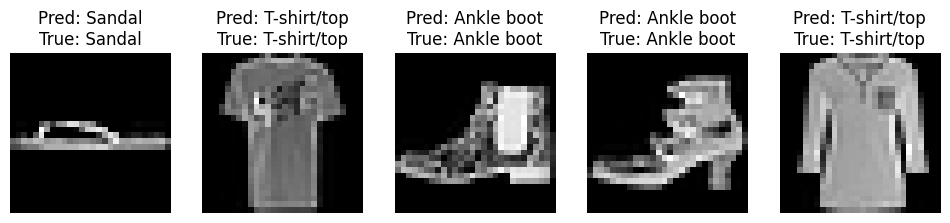


CNN Predictions:


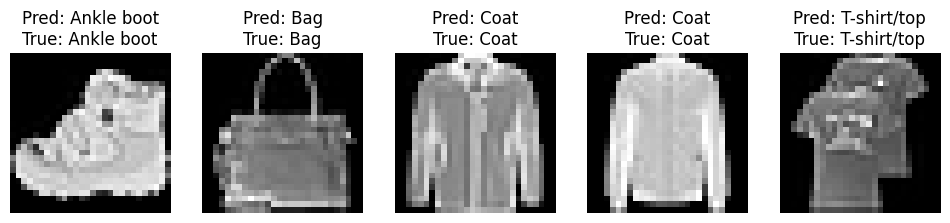

Simple Neural Network (NN) Test Accuracy: 0.8814
Convolutional Neural Network (CNN) Test Accuracy: 0.9097


In [ ]:
def show_predictions(model, x_data, y_data, is_cnn=False, num_samples=5):
    plt.figure(figsize=(12, 6))
    idx = np.random.choice(len(x_data), num_samples, replace=False)
    for i, n in enumerate(idx):
        plt.subplot(1, num_samples, i+1)
        img = x_data[n].reshape(28,28)
        pred = model.predict(x_data[n].reshape(1,-1) if not is_cnn else x_data[n].reshape(1,28,28,1), verbose=0)
        pred_label = np.argmax(pred)
        plt.imshow(img, cmap="gray")
        plt.title(f"Pred: {class_names[pred_label]}\nTrue: {class_names[y_data[n]]}")
        plt.axis("off")
    plt.show()

print("\nSimple Neural Network Predictions:")
show_predictions(nn_model, x_test_nn, y_test, is_cnn=False)

print("\nCNN Predictions:")
show_predictions(cnn_model, x_test_cnn, y_test, is_cnn=True)

print(f"Simple Neural Network (NN) Test Accuracy: {nn_test_acc:.4f}")
print(f"Convolutional Neural Network (CNN) Test Accuracy: {cnn_test_acc:.4f}")

##Final Comparison

In [ ]:
print("Final Results:")
print(f"\nSimple Neural Network (NN) Test Accuracy: {nn_test_acc:.4f}")
print(f"Convolutional Neural Network (CNN) Test Accuracy: {cnn_test_acc:.4f}")
print(f"\nCNN performed better than Simple NN by {(cnn_test_acc - nn_test_acc)*100:.2f}%")

Final Results:

Simple Neural Network (NN) Test Accuracy: 0.8814
Convolutional Neural Network (CNN) Test Accuracy: 0.9097

CNN performed better than Simple NN by 2.83%


## Test set Accuracy Visualization

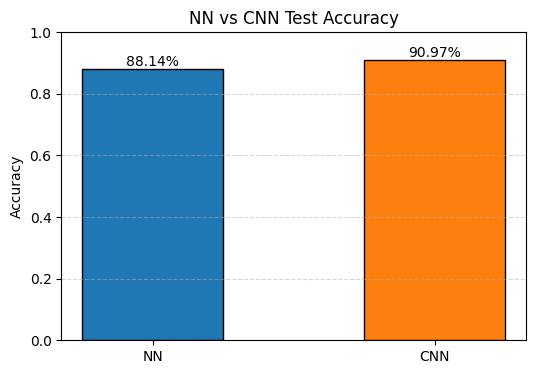

In [ ]:
import matplotlib.pyplot as plt

models = ["NN", "CNN"]
accuracies = [nn_test_acc, cnn_test_acc]
colors = ["#1f77b4", "#ff7f0e"]

plt.figure(figsize=(6,4))
bars = plt.bar(models, accuracies, color=colors, edgecolor='black', width=0.5)
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("NN vs CNN Test Accuracy")

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.01,
             f"{acc*100:.2f}%", ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()